<a href="https://colab.research.google.com/github/2303A51243/adm.project/blob/main/ADM(project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('data.csv')

data.drop(columns=['id'], inplace=True, errors='ignore')
data.drop(columns=[col for col in data.columns if 'Unnamed' in col], inplace=True)

data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

X = data.drop(columns='diagnosis')
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

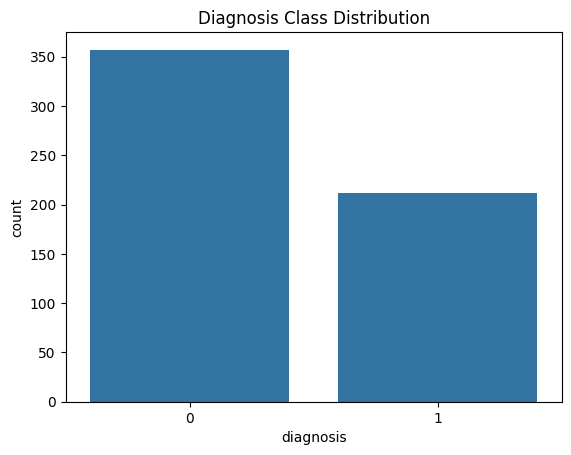

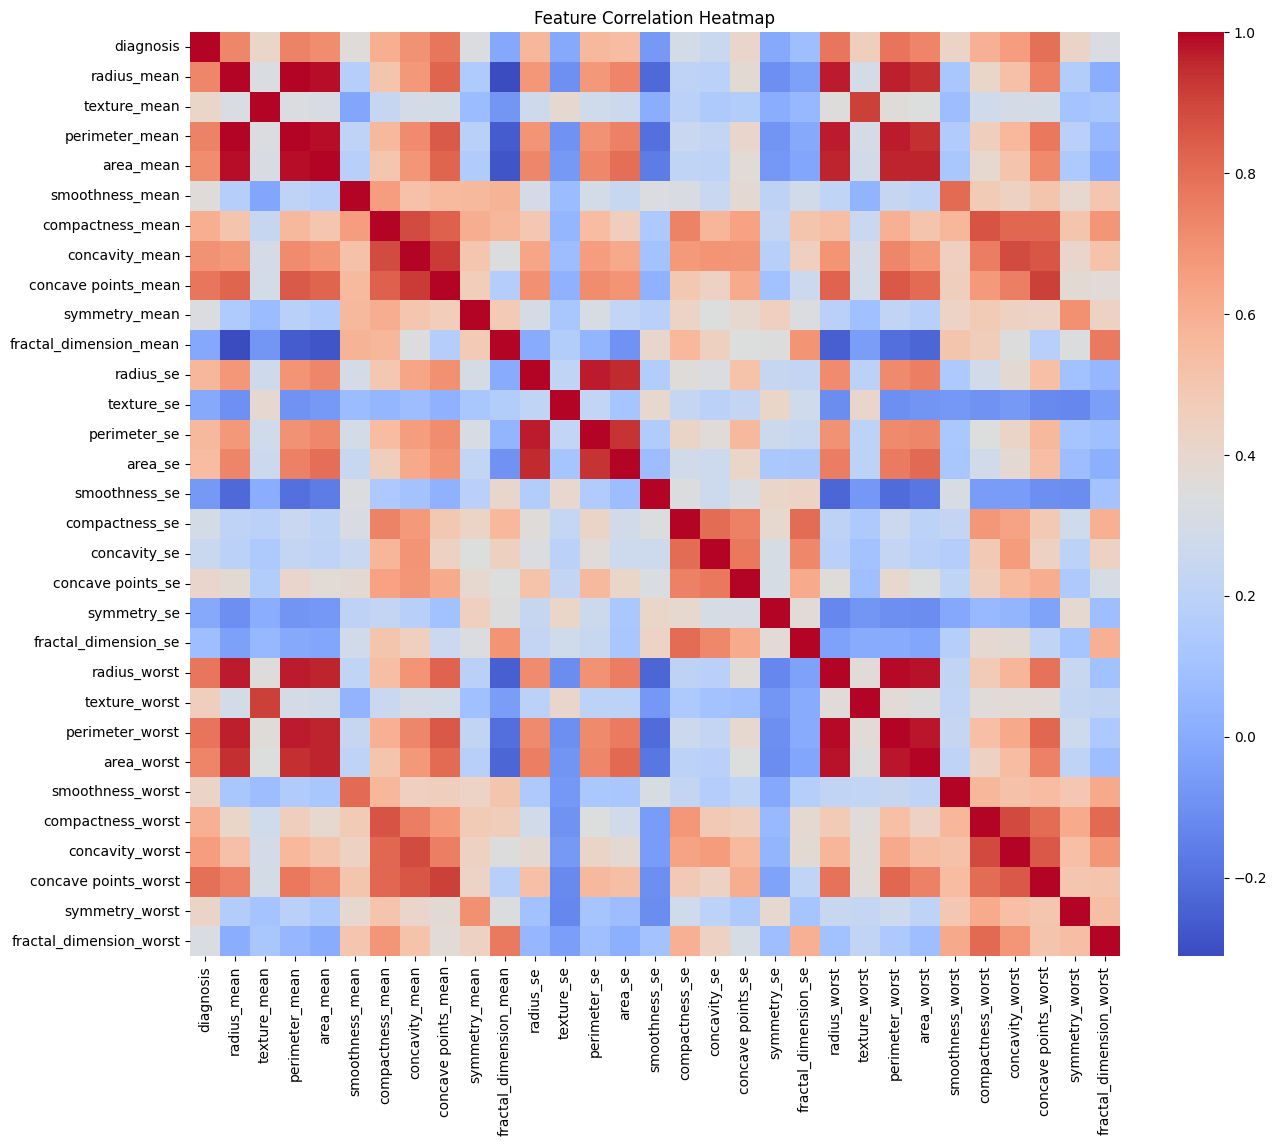

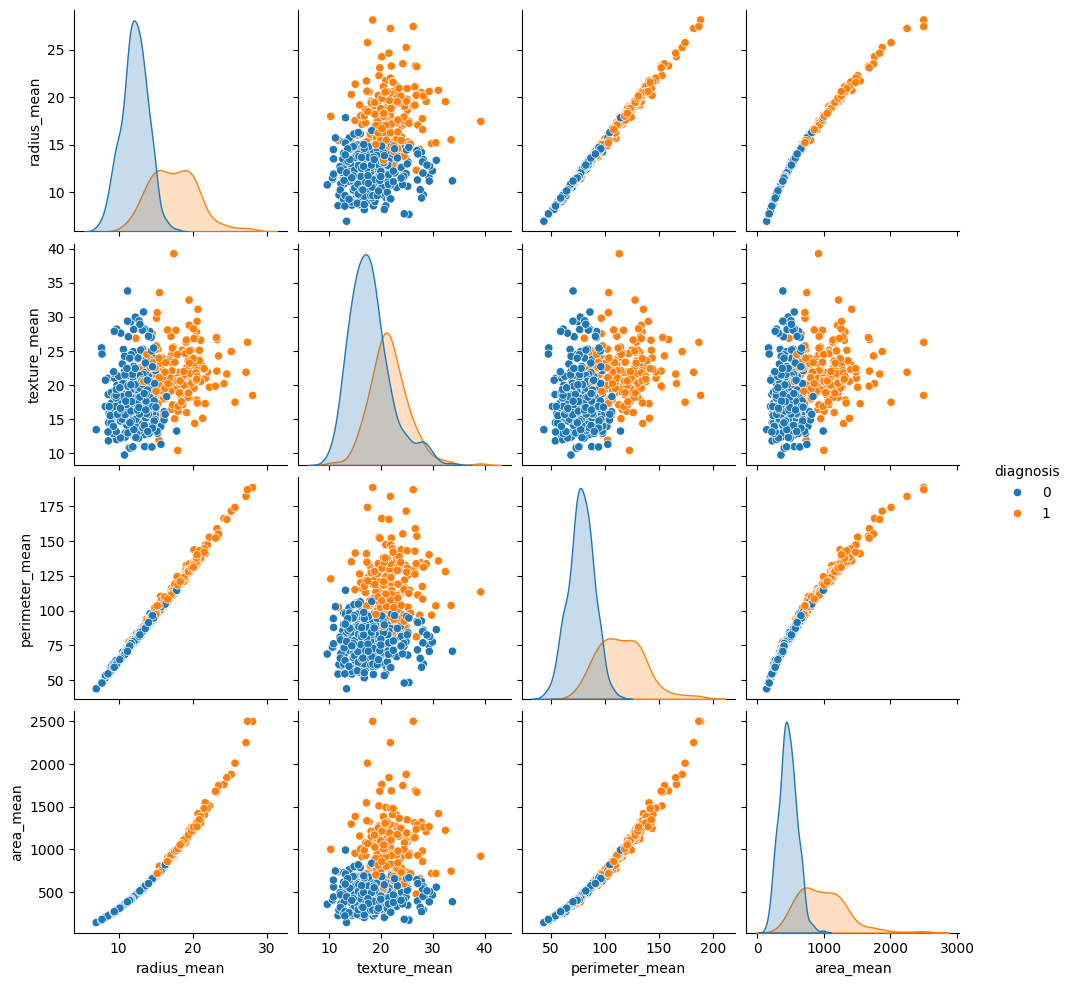

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='diagnosis', data=data)
plt.title('Diagnosis Class Distribution')
plt.show()

plt.figure(figsize=(15, 12))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

sns.pairplot(data[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']], hue='diagnosis')
plt.show()

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.9649122807017544


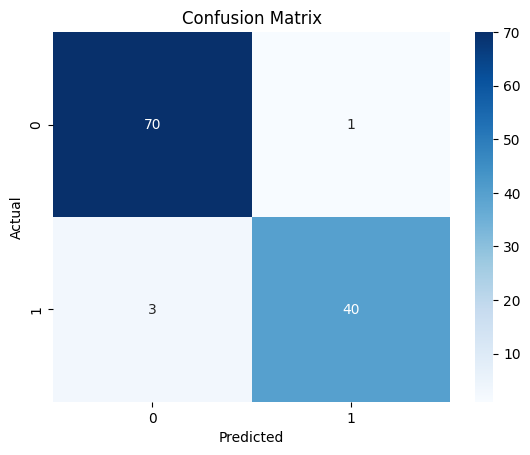

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



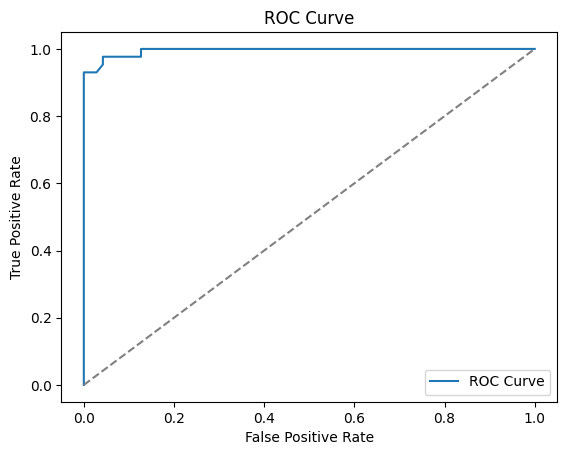

ROC AUC Score: 0.995250573206682


In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

y_pred = model_rf.predict(X_test_scaled)
y_prob = model_rf.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('data.csv')

data.drop(columns=['id'], inplace=True, errors='ignore')
data.drop(columns=[col for col in data.columns if 'Unnamed' in col], inplace=True)

data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

X = data.drop(columns='diagnosis')
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test):", roc_auc_score(y_test, y_prob))